# Plotting CSV file

Plotting from the CSV database file `database.csv`

            2
-3.814e-06 x + 0.0003717 x + 0.0008898


<IPython.core.display.Math object>

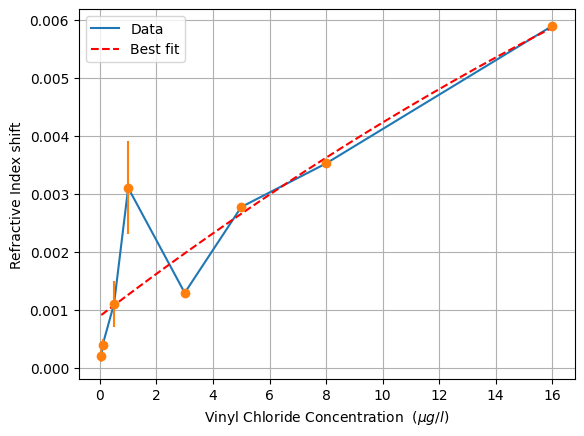

In [25]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
from IPython.display import display, Math

# Variables
csv_path = "../database.csv"

data = pd.read_csv(csv_path)

# Filtering the data
# data = data[data['source'] == 'measurements'] # My measurements
# data = data[data['source'] != 'measurements'] # The measurements from the paper

# Sorting the data
data = data.sort_values(by=['vc_concentration'])

vc_concentration = data['vc_concentration'].values
ri_shift = data['ri_shift'].values
uncertainty = data['uncertainty'].fillna(0).values

# Best fit
bestfit_coefficients = np.polyfit(vc_concentration, ri_shift, 2)
bestfit_function = np.poly1d(bestfit_coefficients)

fit_estimate_values = []
for i in vc_concentration:
    fit_estimate_values.append(bestfit_function(i))

fit_properties = sc.stats.linregress(ri_shift, fit_estimate_values)
r_squared = np.power(fit_properties.rvalue,2)

print(bestfit_function)
display(Math(r'R^2: {}'.format(r_squared)))

bestfit_x = np.linspace(vc_concentration[0], vc_concentration[-1], 50) # From start to end, 50 points
bestfit_y = bestfit_function(bestfit_x)

# Plotting
plt.plot(vc_concentration, ri_shift, label='Data')
plt.errorbar(vc_concentration, ri_shift,
                yerr = uncertainty,
                fmt = 'o')

plt.plot(bestfit_x, bestfit_y, label='Best fit', color='red', ls='--')

plt.grid(True)
plt.xlabel('Vinyl Chloride Concentration  ($\\mu g/l$)')
plt.ylabel('Refractive Index shift')
plt.legend()
plt.show()